In [1]:
using SeisPlot
using SeisReconstruction
using SeisProcessing
using LinearAlgebra
using DSP

In [2]:
dt=0.002; # dt 
nt=512; #number of simples in time dimension
nx1=64; # number of samples in x1 dimension
nx2=64; # number of samples in x2 dimension
dx1=10.0; 
dx2=10.0;
f0= 25.0; # dominant frequency for the wavelet
tau=[0.256, 0.512, 0.768]; # t0 for the events
amp=[1.0, 0.5, -1.0]; # amplitude 
p2=[0.3,0.0, -0.45] ; # ray parameter dimension 1
p1=[0.15,0.0, -0.15]; # ray paramteter dimension2 


In [3]:

data=SeisParabEvents( tau=tau,amp=amp, p2=p2,p1=p1, dt=dt, nt=nt, dx1=dx1, nx1=nx1, dx2=dx2, nx2=nx2, f0=f0);

nt,nr,ns=size(data);

d_obs =(10^9)*copy(data); # scale



In [4]:
d_obsn= SeisAddNoise(d_obs, 1.0, db=false, L=9);


In [5]:
d_obsn=SeisDecimate(d_obsn;mode="random",perc=20);

In [6]:
S = CalculateSampling(d_obsn)


512×64×64 Array{Float32, 3}:
[:, :, 1] =
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0  1.0  

In [ ]:
patch_size=(64,32,32); #Patch size in LocalFourier Operator5mu=μ,to
Noverlap=(32,16,16); #Overlap of patches in LocalFourier Operator
dims=size(d_obs); #Parameter to recover the right dimensions.
μ= 0.1;
tolout=1.e-6;
parameters=  [Dict(:w => S),
Dict(:patch_size=>patch_size, :Noverlap=>Noverlap, :dims=>dims, :normalize=>true, :padd=>false)];
operators=[WeightingOp, LocalFFTOp];
x0 = zeros(ComplexF64,spec_size(d_obs,patch_size,Noverlap));
m, J = FISTA(x0,d_obsn,operators,parameters, μ=μ,Ni=50,tol=tolout);


      Fast Iterative Soft Thresholding Algorithm (FISTA)       

Power Iteration: 1
Power Iteration: 2
Power Iteration: 3
Power Iteration: 4
Power Iteration: 5
Power Iteration: 6
Power Iteration: 7
Power Iteration: 8
Power Iteration: 9
Power Iteration: 10
Power iteration converged after 10 iterations.

 k          ||y-Ax||²₂                ||x||₁               μ              J
  1     2.7189808173e+22     4.2934219157e+14     1.0000000000e-01     2.7189808216e+22
  2     1.0857282921e+22     6.3140129281e+14     1.0000000000e-01     1.0857282984e+22
  3     3.7069273277e+21     7.8105960865e+14     1.0000000000e-01     3.7069274058e+21


In [9]:
μ= 0.1;
tolout=1.e-6;
x0 = randn(Float64,size(d_obs));
operators=[ WeightingOp, FFTOp];
parameters= [Dict(:w =>S), Dict( :normalize=>true)];
m, J = FISTA(x0,d_obsn,operators,parameters, μ=μ,Ni=50,tolerance=tolout);


 Fast Iterative Soft Thresholding Algorithm (FISTA)


 k          ||y-Ax||²₂                ||x||₁               μ              J/J0
  0     0.0000000000e+00     0.0000000000e+00     1.0000000000e-01     1.0000000000e+00
  1     2.2119639862e+20     1.7502758003e+14     1.0000000000e-01     1.2500002077e-03
  2     5.5299108406e+17     1.8377895902e+14     1.0000000000e-01     3.1252082294e-06
  3     2.6199820397e+16     1.8433981455e+14     1.0000000000e-01     1.4826579869e-07
  4     7.6974887895e+14     1.8425674248e+14     1.0000000000e-01     4.5581677576e-09
  5     4.7268631697e+12     1.8423821127e+14     1.0000000000e-01     2.3494113157e-10
  6     1.0090061468e+12     1.8423893571e+14     1.0000000000e-01     2.1393201824e-10
  7     1.5212107168e+08     1.8423955021e+14     1.0000000000e-01     2.0823159128e-10
  8     1.1180646535e+09     1.8423957854e+14     1.0000000000e-01     2.0823708192e-10
  9     1.0626092862e+07     1.8423955981e+14     1.0000000000e-01     2.0

In [50]:
S = CalculateSampling(d_obsn)

ρ=1.0;
μ= 10.0;
tolout=1.e-8;
x0 = randn(Float64,size(d_obs));
operators=[ WeightingOp, FFTOp];
parameters= [Dict(:w =>S), Dict( :normalize=>true)];
m, J= ADMM(x0,d_obsn,operators,parameters, ρ= ρ , μ=μ, Ne=100, Ni=100,tolin=1e-4, tolout=tolout);


 k          ||y-Ax||²₂                ||x||₁               μ              J/J0
  0     0.0000000000e+00     0.0000000000e+00     1.0000000000e+01     1.0000000000e+00
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  1     1.3447899500e+22     7.6248315469e+13     1.0000000000e+01     1.2500002835e-01
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  2     3.3619752561e+21     1.1437248111e+14     1.0000000000e+01     3.1250028350e-02
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  3     8.4049400466e+20     1.3343456264e+14     1.0000000000e+01     7.8125283495e-03
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  4     2.1012359648e+20     1.4296560211e+14     1.0000000000e+01     1.9531533495e-03
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  5     5.2530946774e+19     1.4773112055e+14     1.0000000000e+01     4.8830959953e-04
Nested iteration i= 1
CGLS convergence reached at k= 1 it

In [10]:
drec=real(FFTOp(m,false,normalize=true))

512×64×64 Array{Float64, 3}:
[:, :, 1] =
 -1.56463e8   8.92516e7  -7.43356e6  …  -1.19296e8   5.25716e7   7.1239e7
 -3.15343e8   5.78733e7   1.28015e7     -1.36543e8   1.45159e8   1.08571e8
 -4.40917e8  -1.03722e6   4.08342e7     -9.86925e7   2.37878e8   1.40389e8
 -5.01527e8  -9.91815e7   5.187e7        7.84977e6   2.81592e8   1.63445e8
 -4.46623e8  -1.678e8     5.08889e7      8.80627e7   2.83917e8   1.64795e8
 -3.17332e8  -2.10422e8   2.66561e7  …   1.18019e8   2.6328e8    1.32876e8
 -1.79137e8  -1.68473e8   4.30863e7      7.43641e7   2.29646e8   6.29155e7
 -7.4153e7   -6.01746e7   7.86833e7     -1.65218e6   2.04874e8  -3.96137e7
 -1.32675e7   5.34475e7   1.36549e8     -5.48287e7   2.05225e8  -8.0099e7
 -2.41057e6   7.86922e7   1.621e8       -9.30759e7   2.39922e8  -5.72326e7
  ⋮                                  ⋱                          
  3.22329e8   9.68154e7  -4.63371e7     -3.05304e8  -9.87704e6   1.78575e8
  3.30256e8   8.0733e7   -5.58453e7     -3.13889e8   3.62092e7   2.3921

In [1]:
using PyPlot
# Make sure SeisPlotTX is already defined or imported

# Example slice index and data (replace with your actual data)
ix = 32  # Inline or crossline index

# Create figure
fig = figure(figsize=(10, 10))

# Panel 1: dtrue
subplot(221)
SeisPlotTX(dtrue[:, :, ix], cmap="gist_gray", interpolation="bilinear", pclip=95)
title("dtrue")
xlabel("Receiver")
ylabel("Time")
gca().tick_params(labelsize=10)

# Panel 2: dobs
subplot(222)
SeisPlotTX(dobs[:, :, ix], cmap="gist_gray", interpolation="bilinear", pclip=95)
title("dobs")
xlabel("Receiver")
ylabel("Time")
gca().tick_params(labelsize=10)

# Panel 3: drec
subplot(223)
SeisPlotTX(drec[:, :, ix], cmap="gist_gray", interpolation="bilinear", pclip=95)
title("drec")
xlabel("Receiver")
ylabel("Time")
gca().tick_params(labelsize=10)

# Panel 4: difference
subplot(224)
SeisPlotTX(drec[:, :, ix] - dtrue[:, :, ix], cmap="seismic", interpolation="bilinear", pclip=95)
title("difference")
xlabel("Receiver")
ylabel("Time")
gca().tick_params(labelsize=10)

tight_layout()


UndefVarError: UndefVarError: `dtrue` not defined

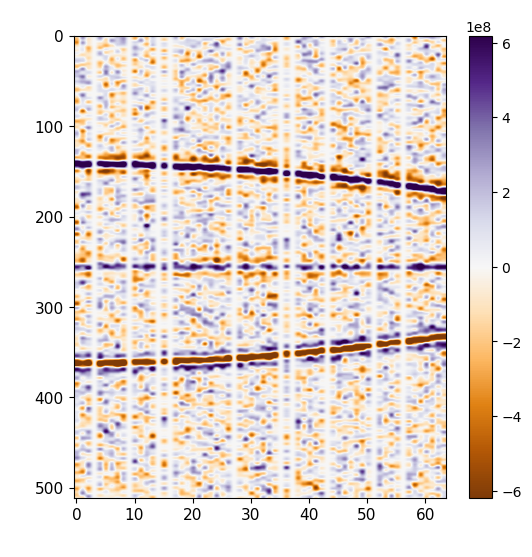

In [12]:
SeisPlotTX(d_obsn[:,:,32]); colorbar(); gcf()